In [27]:
# The data set I will be analyzing contains comprehensive data on exoplanets discovered and the stars they orbit.
# I chose this data set because I find astromomy fascinating. I thought it would be interesting to work with data
# about the universe and see what else is out there. 

# Three questions I have are...

   # 1. How many of the stars contain an actual system of planets with more than one like our own solar system?

   # 2. What are these planets made of? What elements are on them?

   # 3. What are the densities of these planets? What is the relationship of the mass and size?

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kepler.csv')

In [5]:
# Check how many exoplanets are in the data set.

df_mass = df['# name']
df_mass.describe()

count            3732
unique           3732
top       1RXS 1609 b
freq                1
Name: # name, dtype: object

In [12]:
# Let's see what data is availible for these exoplanets.

list(df.columns.values)

['# name',
 'planet_status',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'updated',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_m

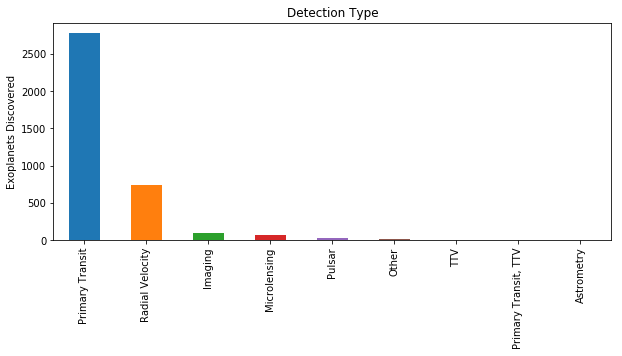

In [14]:
# Pretty extensive. Let's look at the methods of detection to find out how they were discovered.

column = 'detection_type'
plt.figure(figsize=(10, 4))
df[column].value_counts().plot.bar()
plt.title("Detection Type")
plt.ylabel("Exoplanets Discovered")
plt.show()

# We can see that the Primary Transit method is most common. This method uses the Kepler space telescope to 
# scan a segment of the sky for stars. When an exoplanet orbits in front of the star, it dims and is detected 
# by Kepler.


In [8]:
# 1. How many of the stars contain an actual system of planets with more than one like our own solar system?

#Shows how many planets are orbiting the star.

starname = "star_name"
print(df[starname].value_counts())


Kepler-90           8
TRAPPIST-1          7
GJ 667 C            6
Kepler-20           6
HD 40307            6
HD 34445            6
HD 219134           6
HD 10180            6
Kepler-80           6
Kepler-11           6
Kepler-33           5
Kepler-186          5
Kepler-444          5
Kepler-102          5
55 Cnc              5
Kepler-55           5
Kepler-154          5
Kepler-296          5
Kepler-150          5
Kepler-84           5
Kepler-62           5
Kepler-292          5
HIP 41378           5
Kepler-238          5
Kepler-169          5
Kepler-245          4
Kepler-341          4
HD 215152           4
WASP-47             4
Kepler-256          4
                   ..
HD 208527           1
2M 2206-20          1
14 Her              1
Kepler-574          1
MOA-bin-1           1
HD 164595           1
Kepler-933          1
WASP-123            1
HD 104985           1
Kepler-1182         1
WASP-113            1
Kepler-704          1
EPIC 220504338      1
HD 222582           1
Kepler-531

In [31]:
# The majority just have one. Lets narrow it down to 5 or more planets.

# Create columns for star and number of planets
starname = "star_name"
planets_per_star = (df[starname].value_counts())

# Remove stars with less than 5 planets
greaterthanfive = planets_per_star[planets_per_star >= 5]

print (greaterthanfive)

Kepler-90     8
TRAPPIST-1    7
Kepler-80     6
GJ 667 C      6
HD 10180      6
HD 40307      6
HD 34445      6
Kepler-20     6
Kepler-11     6
HD 219134     6
Kepler-84     5
Kepler-186    5
55 Cnc        5
HIP 41378     5
Kepler-292    5
Kepler-444    5
Kepler-154    5
Kepler-102    5
Kepler-33     5
Kepler-169    5
Kepler-296    5
Kepler-150    5
Kepler-238    5
Kepler-62     5
Kepler-55     5
Name: star_name, dtype: int64


In [32]:
# We now have a list of stars with 5 or more planets in orbit. 
# A lot of these stars are named after the Kepler space telescope which discovered them.
# Lets see what percentage that is.

planets_per_star.index.str.replace(r'[^a-zA-Z]+', '').value_counts(normalize = True)

#Over 50% of the stars.


Kepler        0.574293
HD            0.142499
WASP          0.046903
HATP          0.020408
HATS          0.015754
EPIC          0.014322
GJ            0.013605
K             0.012531
CoRoT         0.011815
HIP           0.010741
OGLEBLGL      0.010383
KOI           0.007877
KIC           0.007519
BD            0.006087
MOABLGL       0.005729
KELT          0.004296
M             0.003580
KeplerAB      0.002864
OGLETR        0.002506
HDA           0.002506
TYC           0.002148
Qatar         0.002148
OGLEBLG       0.001790
HR            0.001790
KeplerA       0.001790
MOABLG        0.001790
XO            0.001790
TrES          0.001790
HDB           0.001432
PSRB          0.001432
                ...   
betaPic       0.000358
ROXsB         0.000358
VHya          0.000358
Umi           0.000358
UMi           0.000358
FLLyr         0.000358
SRAB          0.000358
etaCet        0.000358
Lalande       0.000358
kappaCrB      0.000358
PZTel         0.000358
DE            0.000358
Del        

In [33]:
# 2. What are these planets made of? What elements are on them?

# Pull up the molecule data.

molecules = 'molecules'
print(df[molecules].dropna().reset_index())

    index                                          molecules
0       9                                         H2O, CO, K
1      23                                            H2O, CO
2      36                                           CH4, H2O
3      37                                            CO, H2O
4      41                                           H2O, HCN
5     173                                    O2, H2, N2, CO2
6     211                               CH4, H, CO2, CO, H2O
7     212                                                CH4
8     214                                                NH3
9     235                                                CH4
10    253                                                CH4
11    255                                     H2O, O I, K, C
12    274                                                H2O
13    570                                            CO, H2O
14    588                   H2O, O I, CO2, CH4, CO, Na, H, C
15    633  O2, VO, H2O, 

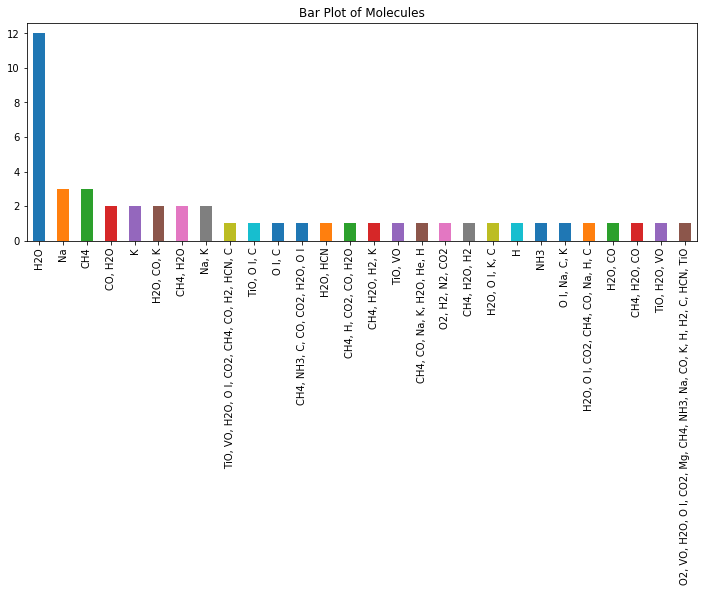

In [15]:
column = "molecules"
plt.figure(figsize=(12, 4))
df[column].value_counts().plot.bar()
plt.title("Bar Plot of Molecules")
plt.show()

In [35]:
# Some of these contain water! Perhaps they contain life as well.
# We can see that there is H2O grouped in with some other elements. 
# Let's find out how many of these planets have water.

pd.Series(', '.join(df.molecules.dropna()).split(', ')).value_counts()

H2O    31
CH4    14
CO     12
K      11
Na      9
O I     8
C       8
CO2     6
H2      5
H       5
TiO     5
VO      4
HCN     3
NH3     3
O2      2
He      1
Mg      1
N2      1
dtype: int64

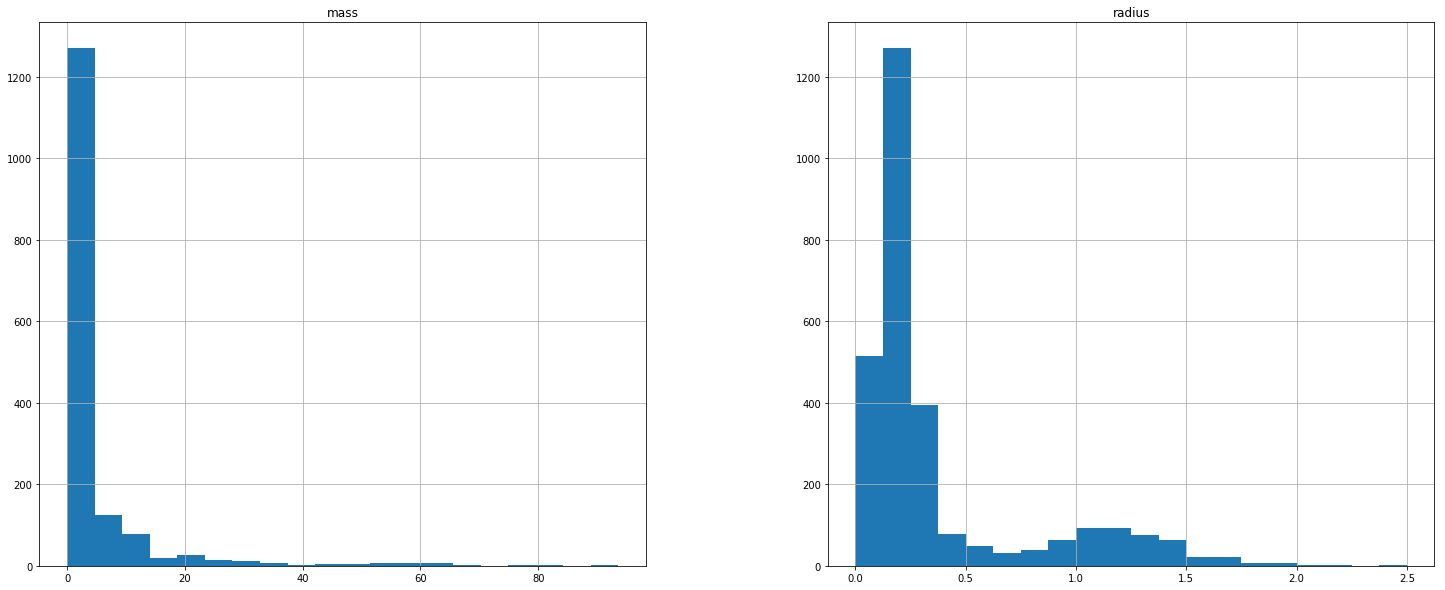

In [36]:
# 31 of the planets with molecular data have water on them.

# 3. What are the densities of these planets? What is the relationship of the mass and size?

# Let's take a histogram to see where these values are.

hist = df.hist(column = ['radius', 'mass'],
              figsize = [25, 10],
                 bins = 20,
              )

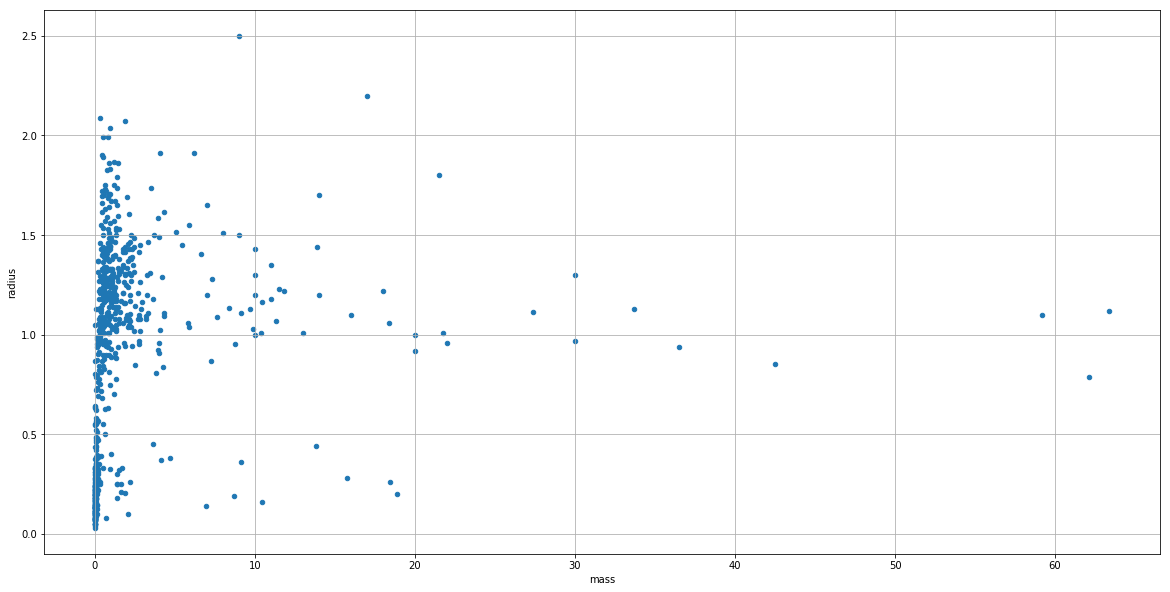

In [37]:
# The mass and radius are in terms of the planet Jupiter. It looks like the majority of exoplanets with this data 
# are less than half the radius of jupiter.

density = df.plot.scatter(x = 'mass',
                          y = 'radius',
                       grid = True,
                    figsize = [20, 10],
                          )

In [ ]:
# This scatter plot shows the over all desities of the exoplanets with mass and radius data.

In [7]:
# Let's check the stats for the mass and radius.

df_radius = df['radius']
df_radius.describe()

count    2826.000000
mean        0.381838
std         0.412572
min         0.000002
25%         0.140000
50%         0.210000
75%         0.332750
max         2.500000
Name: radius, dtype: float64

In [8]:
df_mass = df['mass']
df_mass.describe()

count    1586.000000
mean        4.246192
std         9.706793
min         0.000002
25%         0.117500
50%         0.945500
75%         3.097500
max        93.600000
Name: mass, dtype: float64

In [ ]:
# The mean radius and mass in terms of Jupiter are 0.38 and 4.25 respectivly. So the average 
# exoplanet is 38% the size of Jupiter but 425% more massive. This leads me to believe that 
# the average exoplanet is rocky and not gaseous like Jupiter.

In [38]:
# For further research, I would like to take a deeper look at the densities of the exoplanets. 
# The data gave the radius and mass in terms of Jupiter and I would like to spend more time converting that 
# into kilograms and kilometers to input into equations to find the force of gravity.
# With this information, I could calculate how much would a person weigh or how fast would something or 
# someone need to travel to orbit the exoplanet? 